In [14]:
# import sys 
# sys.path.append('~/DL_project/MyProblem/') 
from DTLZ1 import DTLZ1
import geatpy as ea

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
import time
import matplotlib.pyplot as plt 
import numpy as np 
import math

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
seed = 1
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

In [15]:
class Net(nn.Module):
    def __init__(self, N):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(N, 5000)
        self.fc2 = nn.Linear(5000, 5000)
        self.fc3 = nn.Linear(5000, 3)
#         self.fc4 = nn.Linear(200, 3)
        # self._initialize_weights()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
        x = self.fc3(x)
        return x


In [20]:
def train(model, data, target, N, epochs, optimizer, criterion):
    model.train()
    train_loss = []
    train_time = []
#     predicts_data = []

    for epoch in range(1, epochs+1):
        print(epoch)
        run_time = time.time()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        run_time = time.time() - run_time
        train_loss.append(loss.item())
        train_time.append(run_time)
        # if epoch % n == 0:
        #     print('epoch:', epoch)
        #     print('Training set: average loss = {:.4f}, total time = {:.4f}'.format(np.mean(train_loss[epoch-n:epoch]), sum(train_time[epoch-n:epoch])))
#     predicts_data.append(output.cpu().detach().numpy())
#     predicts_data = np.hstack(predicts_data)

    fig = plt.figure()
    t = list(range(epochs))
    plt.plot(t, train_loss)
    plt.xlabel('Epoch Number')
    plt.ylabel('Loss Value')
    plt.show()
    
    fig = plt.figure()
    t = list(range(epochs))
    plt.plot(t, train_time)
    plt.xlabel('Epoch Number')
    plt.ylabel('Train Time')
    plt.show()

    return train_loss, train_time #, predicts_data

Net(
  (fc1): Linear(in_features=7, out_features=5000, bias=True)
  (fc2): Linear(in_features=5000, out_features=5000, bias=True)
  (fc3): Linear(in_features=5000, out_features=3, bias=True)
)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


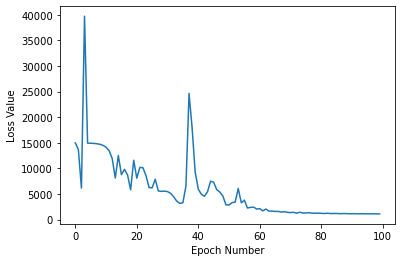

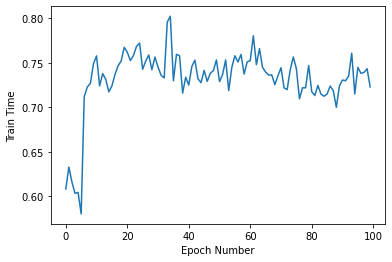

In [25]:
myProblem = DTLZ1(M=3)  # 实例化问题对象
N = 1000 # 定义样本数

## 以下部分固定不变，是固定写法（该模块用于生成样本）
Encoding = 'RI'
Field = ea.crtfld(Encoding, list(myProblem.varTypes), myProblem.ranges, myProblem.borders)
pop = ea.Population(Encoding, Field, N)
Vars = ea.crtpc(Encoding, pop.sizes, pop.Field)  # 随机生成数值在范围内的随机样本
pop.Phen = Vars
myProblem.aimFunc(pop)  # 计算Objective Value
## 以上部分固定不变，是固定写法

# 至此，pop.ObjV 存储的是目标函数值矩阵，pop.Phen存储的是决策变量矩阵
# print(pop.Phen)
# print(pop.ObjV)

data = torch.as_tensor(pop.Phen, dtype=torch.float32).to(device)
target = torch.as_tensor(pop.ObjV, dtype=torch.float32).to(device)
data_num = data.shape[0]
Dim = data.shape[1]

epochs = 100
model = Net(N=Dim).to(device)
print(model)
criterion = nn.MSELoss() # CrossEntropyLoss() 
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.005)
train_loss, train_time = train(model, data, target, N, epochs, optimizer, criterion)


In [26]:
print(len(train_time))
print(train_time)
sum(train_time)

100
[0.6083190441131592, 0.6329078674316406, 0.6161336898803711, 0.6033720970153809, 0.6044309139251709, 0.5802779197692871, 0.7119235992431641, 0.7230386734008789, 0.7269704341888428, 0.7489581108093262, 0.7578973770141602, 0.7241611480712891, 0.7379798889160156, 0.7315270900726318, 0.7174451351165771, 0.7241084575653076, 0.736947774887085, 0.7468366622924805, 0.7520313262939453, 0.7675337791442871, 0.7620086669921875, 0.752598762512207, 0.7583105564117432, 0.7685413360595703, 0.7723388671875, 0.7428185939788818, 0.7520537376403809, 0.7588880062103271, 0.7423014640808105, 0.7565686702728271, 0.7452743053436279, 0.7361080646514893, 0.7331011295318604, 0.7958066463470459, 0.8024325370788574, 0.7298786640167236, 0.7596454620361328, 0.7580437660217285, 0.7160272598266602, 0.7339646816253662, 0.7250726222991943, 0.7460215091705322, 0.7531218528747559, 0.7321546077728271, 0.7278037071228027, 0.7416336536407471, 0.7292590141296387, 0.7383067607879639, 0.7413074970245361, 0.7533788681030273, 

73.17893862724304